In [190]:
import numpy as np
import matplotlib.pyplot as plt


# Define potential

In [3]:
def coulomb(r, d, r0, alpha):
    return (d/2)*((3/2)*np.exp(-2*alpha*(r - r0)) - np.exp(-alpha*(r-r0)))
coulomb(d=4.746, r=1, r0=0.742, alpha=1.942)

-0.13105045122663772

In [4]:
def exchange(r, d, r0, alpha):
    return (d/4)*(np.exp(-2*alpha*(r - r0)) - 6*np.exp(-alpha*(r-r0)))
exchange(d=4.746, r=1, r0=0.742, alpha=1.942)

-3.8778352588641103

In [5]:
# plt.plot([coulomb(d=4.746, r=x, r0=0.742, alpha=1.942) for x in list(range(10))])

In [6]:


def potential(r_ab, r_bc, a=0.05, b=0.30, c=0.05, d_ab=4.746, 
                d_bc=4.746, d_ac=3.445, r0=0.742, alpha=1.942):
    Q_AB = coulomb(r=r_ab, d=d_ab, r0=r0, alpha=alpha)
    Q_BC = coulomb(r=r_bc, d=d_bc, r0=r0, alpha=alpha)
    Q_AC = coulomb(r=d_ac, d=d_ac, r0=r0, alpha=alpha)
    
    J_AB = exchange(r=r_ab, d=d_ab, r0=r0, alpha=alpha)
    J_BC = exchange(r=r_bc, d=d_bc, r0=r0, alpha=alpha)
    J_AC = exchange(r=d_ac, d=d_ac, r0=r0, alpha=alpha)
    
    result_Qs = (Q_AB/(1 + a)) + (Q_BC/(1+b)) + (Q_AC/(1+c)) 
    result_Js_1 = ((J_AB**2) / ((1+a)**2)) + ((J_BC**2) / ((1+b)**2)) + ((J_AC**2) / ((1+c)**2))
    result_Js_2 = ((J_AB*J_BC)/((1+a)*(1+b))) + ((J_AC*J_BC)/((1+c)*(1+b)))+ ((J_AB*J_AC)/((1+a)*(1+c)))
    result_Js = result_Js_1 - result_Js_2
    
    
    result = result_Qs - (result_Js)**(1/2)
    return result
potential(1,1)

-3.603030632314499

In [581]:
def toy_potential(x, y, height=1):
    result = -x**2 + -y**2 + 10
    return np.where(result<0, 0, result)

In [582]:
def toy_grad(x, y ):
    if toy_potential(x, y)==0: return [0,0]
    dx = -2*x 
    dy = -2*y
    
    return dx, dy

In [600]:
def toy_potential_2(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2

In [622]:
def toy_grad_2(x, y):
    dx = 2*(x**2 + y - 11)*(2*x) + 2*(x + y**2 - 7)
    dy = 2*(x**2 + y - 11) + 2*(x+y**2 - 7)*(2*y)
    return dx, dy

In [692]:
def spring_grad(x, y, neighs, k=0.1, ideal_distance=0.5, en_func=toy_potential, grad_func=toy_grad):
    pe_grad = grad_func(x, y)
    # pe_grad = 0
    

    
    grads_neighs = []
    for neigh in neighs:
        neigh_x, neigh_y = neigh
        dist_x = np.abs(neigh_x - x)
        dist_y = np.abs(neigh_y - y)
        
        force_x = -k*(dist_x - ideal_distance)
        force_y = -k*(dist_y - ideal_distance)
        # print(f"\t{force_x=} {force_y=}")
        
        if (neigh_x > x): 
            force_x*= -1
        
        if  (neigh_y > y): 
            force_y*= -1

        
            
        
        grads_neighs.append((force_x, force_y))
    
    # print(f"\t{grads_neighs=}")
        
    tot_grads_neighs = np.sum(grads_neighs, axis=0)
    # print(f"{tot_grads_neighs}")
    return tot_grads_neighs - pe_grad
        
        

In [584]:
# x = np.linspace(start=0,stop=4, num=10)
# y = x.reshape(-1,1)
# h = potential(x, y, d_ac=1)
# cs = plt.contourf(h)


In [585]:
def dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [586]:
def update_points(chain, grad, dr):
    new_chain = []
    for point in chain:
        p_current = point 

    

        p_x, p_y = p_current
        grad_x, grad_y = grad(p_x, p_y)
        p_new = (p_x + (-grad_x*dr), p_y + (-grad_y*dr))



        p_current = p_new
        new_chain.append(p_current)
        
    return new_chain
        


In [730]:
def update_points_spring(chain, dr,  en_func, grad_func, k=1, ideal_dist=0.5):
    new_chain = [chain[0]]

    
    for i in range(1, len(chain)-1):

        
        point = chain[i]
        p_current = point 

    

        p_x, p_y = p_current
        if i==0:
            neighs= [chain[1]]
        elif i==len(chain)-1:
            neighs=[chain[-2]]
            
        else:
            neighs=[chain[i-1], chain[i+1]]
        grad_x, grad_y = spring_grad(p_x, p_y, neighs=neighs, k=k, ideal_distance=ideal_dist, grad_func=grad_func, en_func=en_func)
        # print(f"{grad_x=} {grad_y=}")
        p_new = (p_x + (grad_x*dr), p_y + (grad_y*dr))



        p_current = p_new
        new_chain.append(p_current)
    new_chain.append(chain[-1])
        
    return new_chain

### NB:
For top left to bottom right, k=25, idealdist=10

[[-4.  4.]
 [-3.  3.]
 [-2.  2.]
 [-1.  1.]
 [ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]
 [ 4. -4.]]
chain_current=array([[-4.,  4.],
       [-3.,  3.],
       [-2.,  2.],
       [-1.,  1.],
       [ 0.,  0.],
       [ 1., -1.],
       [ 2., -2.],
       [ 3., -3.],
       [ 4., -4.]])

final chain: [array([-4.,  4.]), (-2.929527116668976, 3.2163980404935715), (-2.7116391822714725, 3.1273103350541143), (-1.916366713693304, 3.0198837836061694), (2.2215905614256295, 2.29654108715057), (3.110309921548038, 1.2749499154168134), (3.4827126862133917, -0.9115386748882758), (3.6211813930612626, -2.0749801011439293), array([ 4., -4.])]
dist 0-1: 1.3266288949398586
dist 1-2: 0.2353970501439606
dist 2-3: 0.8024953353349862
dist 3-4: 4.200704115648396
dist 4-5: 1.3540570974743762
dist 5-6: 2.2179756929832966
dist 6-7: 1.1716524805179696
dist 7-8: 1.9619391295233504


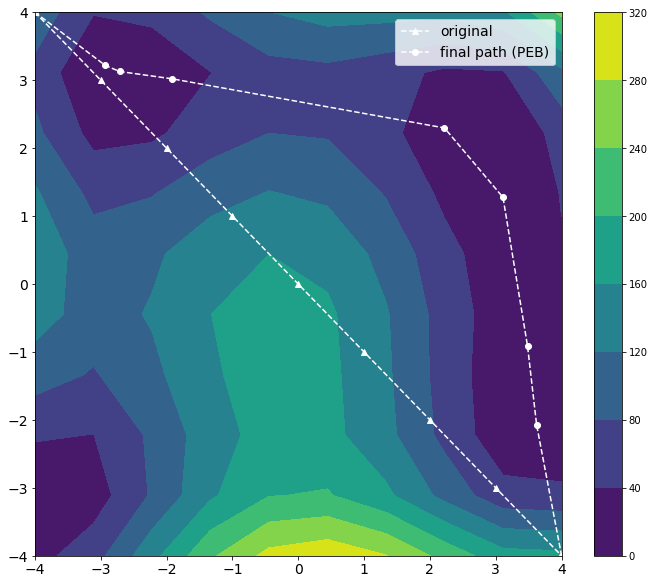

In [740]:
np.random.seed(1)
fs = 14
# vars for sim
nsteps = 1000
dr=.01
nimages = 9

en_func = toy_potential_2
grad_func = toy_grad_2


# set up plot for potential
min_val = -4
max_val=4
num=10
fig=10
f,ax = plt.subplots(figsize=(1.18*fig, fig))
x = np.linspace(start=min_val,stop=max_val, num=num)
y = x.reshape(-1,1)


h = toy_potential_2(x, y)
cs = plt.contourf(x, x, h)
cbar = f.colorbar(cs)




# # set up points
# chain = np.sort([np.random.uniform(-1, 1, size=2) for n in range(nimages)])
chain = np.linspace((min_val, max_val), (max_val, min_val), nimages)
# chain = np.linspace((-3.7933036307483574, -3.103697226077475), (3, 2), nimages)
# chain = [(-2,-.1),(0,2),(2,.1)]
print(chain)


plt.plot([(point[0]) for point in chain],[(point[1]) for point in chain], '^--',c='white',  label='original')



# dynamics!
chain_current = chain.copy()
print(f"{chain_current=}\n")
for step in range(nsteps):
    new_chain = update_points_spring(chain_current, dr, k=10, ideal_dist=.5, en_func=en_func, grad_func=grad_func)
    # [plt.scatter(point[0], point[1], c='white') for point in chain_current]
    chain_current = new_chain
plt.plot([point[0] for point in chain_current],[point[1] for point in chain_current], 'o--', c='white', label='final path (PEB)')
print(f"final chain: {chain_current}")
for i in range(len(chain_current)-1):
    print(f"dist {i}-{i+1}: {dist(chain_current[i], chain_current[i+1])}")
plt.legend(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.show()



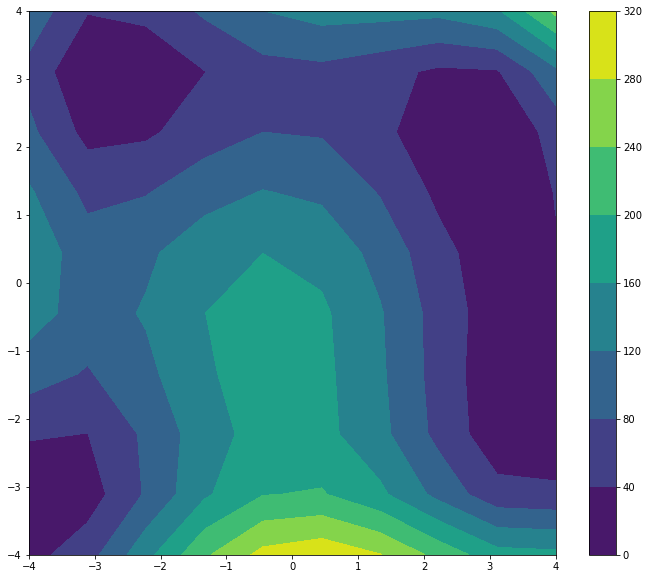

In [741]:
# set up plot for potential
min_val = -4
max_val=4
num=10
fig=10
f,ax = plt.subplots(figsize=(1.18*fig, fig))
x = np.linspace(start=min_val,stop=max_val, num=num)
y = x.reshape(-1,1)


h = toy_potential_2(x, y)
cs = plt.contourf(x, x, h)
cbar = f.colorbar(cs)
# points_x = [point[0] for point in chain_current]
# points_y = [point[1] for point in chain_current]
# plt.scatter(points_x, points_y, c='white')
# print(chain_current)
plt.show()